<a href="https://colab.research.google.com/github/BeMindYou/Lesson/blob/main/Assessment_Tools/%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D1%80_%D0%BF%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

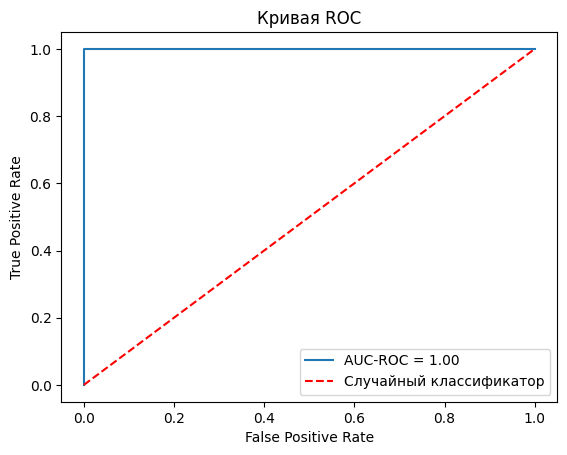

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Генерация тестовых данных
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1)

# Обучение логистической регрессии
model = LogisticRegression()
model.fit(X, y)

# Вычисление вероятностей предсказаний
y_pred_proba = model.predict_proba(X)[:, 1]

# Построение кривой ROC
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
auc_score = roc_auc_score(y, y_pred_proba)

# Визуализация кривой ROC
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Случайный классификатор')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Кривая ROC')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


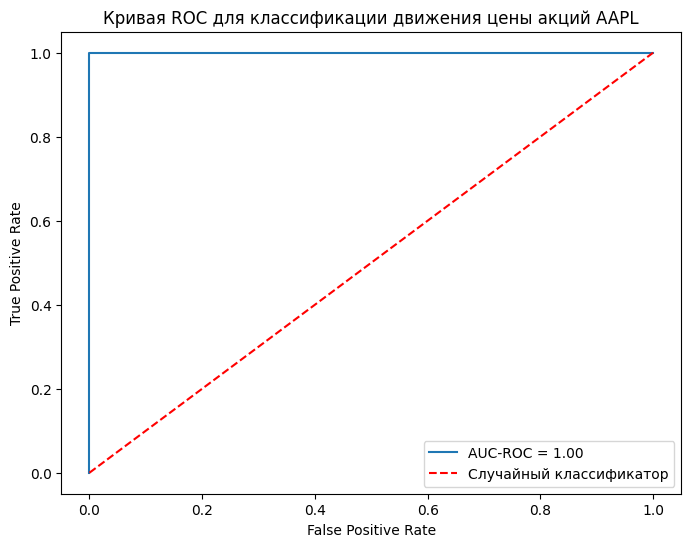

In [ ]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Получение исторических данных котировок акций Apple
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2021-01-01")

# Вычисление дневных изменений цены закрытия
data["Returns"] = data["Adj Close"].pct_change()
data = data.dropna()

# Создание меток классов (1 для положительного изменения, 0 для отрицательного)
y = np.where(data["Returns"] > 0, 1, 0)
X = data["Returns"].values.reshape(-1, 1)

# Разделение данных на обучающую и тестовую выборки
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Обучение логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Вычисление вероятностей предсказаний на тестовых данных
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Построение кривой ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Визуализация кривой ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Случайный классификатор')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Кривая ROC для классификации движения цены акций {ticker}')
plt.legend()
plt.show()

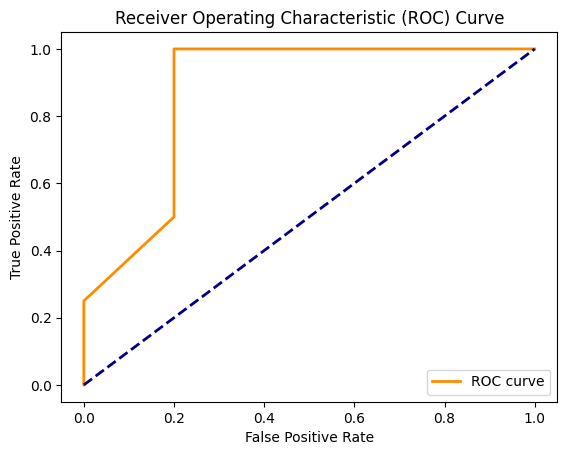

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Получаем вероятности принадлежности к положительному классу
y_true = [0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [0.1, 0.8, 0.4, 0.3, 0.9, 0.8, 0.2, 0.5, 0.3]

# Строим кривую ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Визуализируем кривую ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()